In [1]:
#Cell_1.
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline
import warnings
warnings.simplefilter('ignore')

import gc
import math
import pickle

import mylibs.mylib1 as mylib1
import mylibs.mylib2 as mylib2
import mylibs.mylib3 as mylib3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# 表示する行・列の数を設定
pd.options.display.max_rows = 8
pd.options.display.max_columns = 12

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
#Cell_2.
df_bp = pd.read_csv('./public_stats/processed/df_bp.csv')

f = open('./public_stats/processed/dict_bp_min_dist.binaryfile', 'rb')  # rb: Read Binary
dict_bp_min_dist = pickle.load(f)
f.close()

f = open('./public_stats/processed/dict_sbp_max.binaryfile', 'rb')  # rb: Read Binary
dict_sbp_max = pickle.load(f)
f.close()

f = open('./public_stats/processed/dict_dbp_max.binaryfile', 'rb')  # rb: Read Binary
dict_dbp_max = pickle.load(f)
f.close()

In [3]:
#Cell_3.
dict_bp_min_dist['F']['dbp'].keys()

dict_keys(['20s', '30s', '40s', '50s', '60s', '70s'])

In [4]:
#Cell_4.
def alb_to_ageband(alb):
    if alb <= 29:
        return '20s'
    elif alb >= 70:
        return '70s'
    else:
        return str(int(alb // 10 * 10)) + 's'


alb_to_ageband(55)

'50s'

In [5]:
#Cell_5.
np.random.choice(dict_bp_min_dist['F']['dbp']['30s'], 100, replace=True)

array([80, 60, 80, 60, 60, 80, 70, 80, 60, 70, 80, 80, 60, 90, 70, 70, 60,
       90, 60, 80, 50, 70, 70, 70, 70, 60, 60, 60, 70, 60, 60, 90, 80, 60,
       70, 60, 50, 70, 80, 70, 50, 70, 60, 60, 70, 50, 60, 70, 60, 60, 70,
       70, 80, 80, 70, 60, 60, 80, 80, 80, 50, 80, 70, 70, 80, 60, 80, 70,
       60, 80, 80, 70, 80, 70, 80, 60, 60, 70, 70, 70, 70, 70, 60, 60, 70,
       60, 50, 70, 70, 60, 70, 70, 80, 70, 60, 50, 70, 60, 70, 70],
      dtype=int16)

Text(0.5, 1.0, 'Distribution of DBP (FeMmle, 30s)')

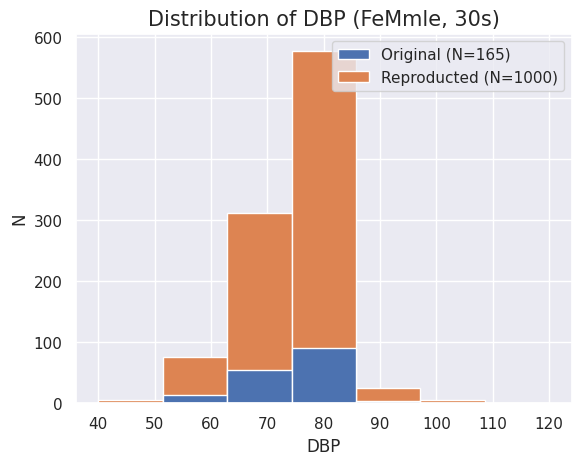

In [6]:
%matplotlib inline
#Cell_6.
# np.random.choice による出力が元の分布に従っていることをヒストグラムにより確認

import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111)

# Original Distribution
dbp_min_0 = dict_bp_min_dist['F']['dbp']['30s']
dbp_max_0 = [dict_dbp_max[dbp_min] for dbp_min in dbp_min_0]
dbp_0 = (dbp_min_0 + dbp_max_0 + 1) / 2  # 血圧
l = len(np.unique(dbp_0))
label = 'Original (N=' + str(len(dbp_0)) + ')'
ax.hist(dbp_0, bins=l, range=(40, 120), label=label, zorder=2)

# Reproducted Distribution
dbp_min_1 = np.random.choice(
    dict_bp_min_dist['F']['dbp']['30s'], 1000, replace=True)
dbp_max_1 = [dict_dbp_max[dbp_min] for dbp_min in dbp_min_1]
dbp_1 = (dbp_min_1 + dbp_max_1 + 1) / 2
label = 'Reproducted (N=1000)'
ax.hist(dbp_1, bins=l, range=(40, 120), label=label, zorder=1)
ax.set_xlabel('DBP')
ax.set_ylabel('N')

ax.legend(loc='best')
ax.set_title('Distribution of DBP (FeMmle, 30s)', fontsize=15)